<h1><center>DETERMINACIÓN DE LA INTESIDAD LUMINICA DE UN EMISOR DE LUZ
EN FUNCIÓN DE LA DISTANCIA ENTRE LAS BOBINAS DE UN CIRCUITO
DE TRANSFERENCIA INALAMBRICA DE ENERGÍA. </center></h1>

#Resumen
________________________________________________________________________________
Se construyó un circuito conformado principalmente por dos bobinas de alambre de cobre por las cuales
se hizo circular corriente electrica y, valiedose del fenomeno de inducción electromagnetica, se empleó un
foto-diodo con el fin de medir la variación de la intensidad lumínica de este en función de la distancia entre
las bobinas. Al concluir el procesamiento de los datos recolectados durante con el montaje experimental, se
observó que al aumentar la distancia la variable exhibe en un comportamiento decreciente y no lineal. Lo
anterior sugiere una relación inversamente propocional entre los dos parametros principales mencionados
anteriormente, lo cual se ajusta a lo esperado teoricamente

#Introducción
________________________________________________________________________________
Michael Faraday, quien a día de hoy se le reconoce como uno de los mayores exponentes de la física por sus aportes a la teoría electromagnetica; condujo multiples experimentos para estudiar los fenomenos relacionados con esta, lo que lo llevo finalmente a descubrir la relación existente entre las corrientes electricas y campos magneticos cambiantes con el tiempo, lo que hoy en día se conoce como ley de inducción de Faraday (Wikipedia, 2022). Esta describe como las corrientes electricas producen campos magneticos y a su vez, como los campos magneticos variables con el tiempo inducen corrientes electricas (Lucas, 2022). Este hecho ha tenido gran impacto en la ciencia y tecnología, siendo buenos ejemplos de esto los transformadores empleados en fuentes de regulación de voltajes; necesarias para el funcionamiento de gran variedad de dispositivos electricos,  o mega proyectos como las centrales hidroelectricas que generan energía por medio de generadores electricos que se valen de esta ley (Wikipedia, 2022).

Otra caracteristica importante a tener en cuenta en relación con los campos magneticos es su dependencia con la distancia. La teoría y la experimentación sugieren que la fuerza de estos decrece con la distancía y, debido a la naturaleza dipolar del de campo magnetico, el factor con el que decrecen en función del inverso del cubo de r, siendo r la distancia desde la fuente generadora (Wikipedia, 2022).

Así, con la motivación de visualizar y entender mejor las propiedades anteriormente descritas, se realizó un montaje experimental que; por medio de la variación en la intensidad luminica de un foto-diodo unido a una bobina alimentada por una  corriente inducida, permite observar el debilitamiento del campo magnetico en función de la distancia. Lo anterior debido a que la intensidad del foto-diodo  es directamente proporcional al voltage que se le proporciona (King, 2008) y este ultimo a su vez lo es al cambio en el flujo del campo magnético (Lucas, 2022), por lo que en ultimas la intensidad lumínica del foto-diodo tambien debería mostrar un comportamiento inversamente proporcional al cubo de la distancia.

#Librerías a usar:
________________________________________________________________________________
Dado que el proyecto unicamente requiere la lectura, procesamiento, realización de calculos simples y analisis de datos (lo cual incluye un ajuste de ellos) se requieren un numero minimo de librerías, siendo estás las clasicas numpy, pandas, matplot y scypy.

In [ ]:
import numpy as np                     #para calculos numericos
import pandas as pd                    #para lectura y almancenamiento de datos
import matplotlib.pyplot as plt        #para graficación de los datos
from scipy.optimize import curve_fit   #Para ajustes en los datos

#Procedimiento y lectura de datos

##Procedimiento
________________________________________________________________________________
El circuito está compuesto esencialmente por 2 bobinas, una con 28 vueltas, y otra con 14 vueltas, además de un LED. Una primera bobina (28 vueltas) funciona como emisor, la cual está conectada a una fuente de voltaje (en este montaje experimental fue usada una batería de 9.9V), un transistor y un resistor; estos dos ultimos tienen la función variar el voltage proporcionado por la fuente creando las condiciones necesarias para producir un campo magnético variable con el tiempo.

La segunda bobina (14 vueltas) funciona como receptor en la cual, debido al flujo cambiante del campo producido por la primera bobina, es inducida con una corriente que permite la activación del LED.

##Lectura de datos
________________________________________________________________________________
Una vez tomados los datos de intensidad luminica en 7 puntos distintos durante un perido de tiempo de 5 segundos, se guardan en archivos separados de formato csv para su posterior lectura, estos documentos son proporcionados con el presente notebook para su respectiva carga y lectura.

In [ ]:
onlyfiles = ['datos_655.csv',
 'datos_2745.csv',
 'datos_1860.csv',
 'datos_1070.csv',
 'datos_530.csv',
 'datos_375.csv',
 'datos_3220.csv']

Dado que los datos tomados en cada posición corresponden a un intervalo de 5 segundos, durante la lectura de los datos es necesario sacar la media en cada uno de ellos para facilitar su analisis y comprensión.

In [ ]:
data = [np.mean(pd.read_csv(str(i)).I) for i in onlyfiles]            #Extracion de la media de cada paquete de datos
data = np.array(sorted(data)[::-1])                              #reordenamiento de los datos
distance = np.array([3.75, 5.30,6.55,10.70,18.60, 27.45, 32.20]) #Distancias de medición

#Resultados


##Tabla de datos
________________________________________________________________________________
Debido a las condiciones en las que se realiza el experimento y las limitaciones de los instrumentos de medición el número de medidas fue limitado, en caso de replicar esta práctica se sugiere aumentar el numero datos a recolectar. En la tabla se registran los valores obtenidos, los valores de intensidad lumínica corresponden a la media de los datos recolectados a una misma distancia durante un intervalo de 5 segundos aproximadamente.

In [ ]:
pd.DataFrame({'Distancia':distance, 'Intensidad lumínica':data})

,Distancia,Intensidad lumínica
0,3.75,110.710556
1,5.30,96.087059
2,6.55,89.220000
3,10.70,79.190000
4,18.60,78.205000
5,27.45,58.245000
6,32.20,56.391667


##Gráfico inicial
________________________________________________________________________________
Al realizar un analisis preliminar de los datos obtenidos se obtiene una gráfica con una tendencia notablemente decreciente y no lineal, lo que da indicios de la relación existente entre la luminosidad y la distancía.


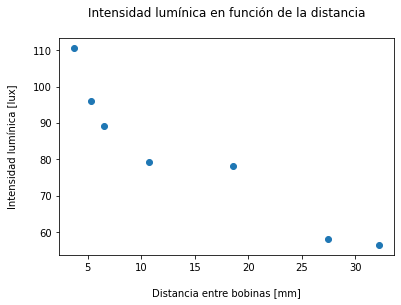

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Intensidad lumínica en función de la distancia\n')
plt.xlabel('\nDistancia entre bobinas [mm]')
plt.ylabel('Intensidad lumínica [lux]\n')
ax.scatter(distance,data)

##Ajuste no lineal
________________________________________________________________________________
Debido a la naturaleza del campo magnetico discutida anteriormente, se optó por realizar un ajuste de los datos usando como curva base la funcion:

\begin{equation}
\frac{1}{r^3}
\end{equation}

donde r corresponde a la distancia entre las bobinas. Al graficar la curva de ajuste, se observa de manera clara como la luminosidad tiende a cero a medida que se aumenta la distancia.

In [ ]:
def inverse_cube(r,A):
  return A*(1/r**3)

poli = curve_fit(inverse_cube, distance,data)

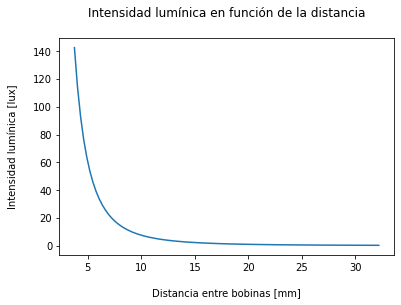

In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ran = np.linspace(3.75,32.20,100)

ax2.set_title('Intensidad lumínica en función de la distancia\n')
plt.xlabel('\nDistancia entre bobinas [mm]')
plt.ylabel('Intensidad lumínica [lux]\n')
ax2.plot(ran, inverse_cube(np.linspace(3.75,32.20,100), poli[0][0]))

##Linealización
________________________________________________________________________________
No obstante, lo anterior aún no da resultados convincentes sobre la relación de proporcionalidad entre las dos variables, en este caso resulta util linealizar los datos iniciales y posteriormente realizar ajuste por medio de minimos cuadrados para observar el comportamiento de la recta resultante.

In [ ]:
log_distance = np.log10(distance)
log_data = np.log10(data)
log_distance

array([0.57403127, 0.72427587, 0.8162413 , 1.02938378, 1.26951294,
       1.43854235, 1.50785587])

In [ ]:
def line(x,a,b):
  return a*x + b

poli2 = curve_fit(line, log_distance, log_data)
a,b = poli2[0][0],poli2[0][1]

In [ ]:
np.sqrt(np.diag(poli2[1]))

array([0.03357086, 0.03706864])

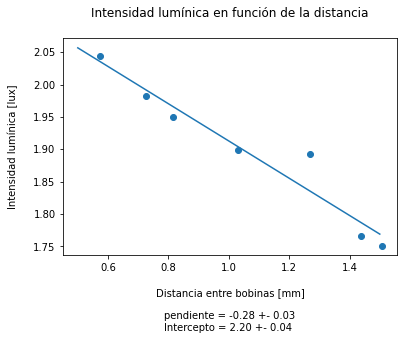

In [ ]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ran2 = np.linspace(0.5,1.5,10)
regression = line(ran2, a, b)
ax3.set_title('Intensidad lumínica en función de la distancia\n')
plt.xlabel("""
Distancia entre bobinas [mm]
             
pendiente = -0.28 +- 0.03
Intercepto = 2.20 +- 0.04 """)
plt.ylabel('Intensidad lumínica [lux]\n')
ax3.scatter(log_distance,log_data)
ax3.plot(ran2,regression)

La información aportada por este último paso proporciona datos concluyentes, pues se observa que la pendiente de la grafica es aproximadamente -0.3 (debería ser de -3, pero dadas las unidades de distancia usadas el resultado que en un orden de magnitud menor); lo que indica que en efecto, la relación entre la intensidad lumínica del LED disminuye (por lo menos aproximadamente) con el cubo de la distancia de separación entre las bobinas involucradas en el proceso de inducción electromagnética. No solo ello, sino que la gráfica provee además el valor aproximado de la luminosidad si la distancia entre bobinas se hiciese nula, medida que no se pudo tomar en la practica debido a las condiciones del montaje.

#Conclusiones

1. Se puede concluir que la intensidad lumínica, es inversamente proporcional a cubo de la distancia entre las bobinas, lo cual era lo esperado desde un inicio.

2. La intensidad máxima que se lograría si se pudiese hacer la distancia entre las bobinas infinitamente pequeña sería de 158 lux aproximadamente, dado el valor de intercepto en la linealización de 2.2.

3. La intensidad del campo magnetico, dada su relación con la corriente inducida en la bobina secundaria y de esta ultima con la intensidad lumínica del LED, puede concluirse, varía de manera similar a como lo hace el LED.


#Referencias
________________________________________________________________________________
1. Force between magnets (05 de febrero de 2022).En $wikipedia$. https://en.wikipedia.org/wiki/Force\_between\_magnets

2. Jim, Lucas. (18 de febrero de 2022). What is Faraday's law of induction? .En $LiveScience$. https://www.livescience.com/53509-faradays-law-induction.html

3. King, Sean. (junio de 2008). Luminous Intensity of an LED as a Function of Input Power.